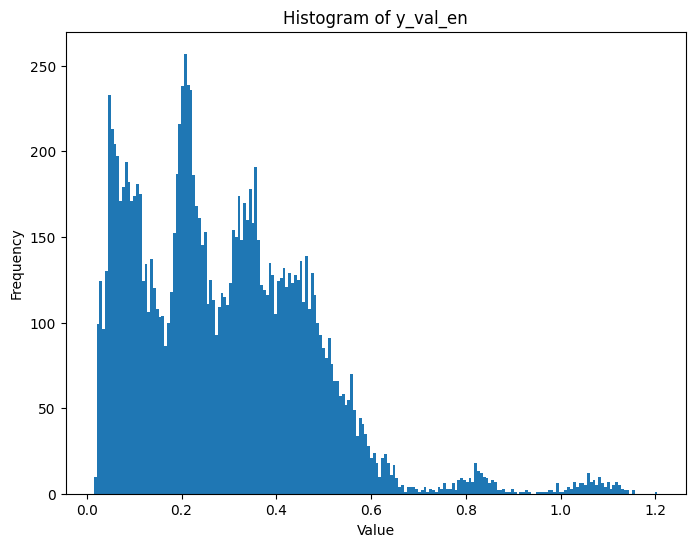

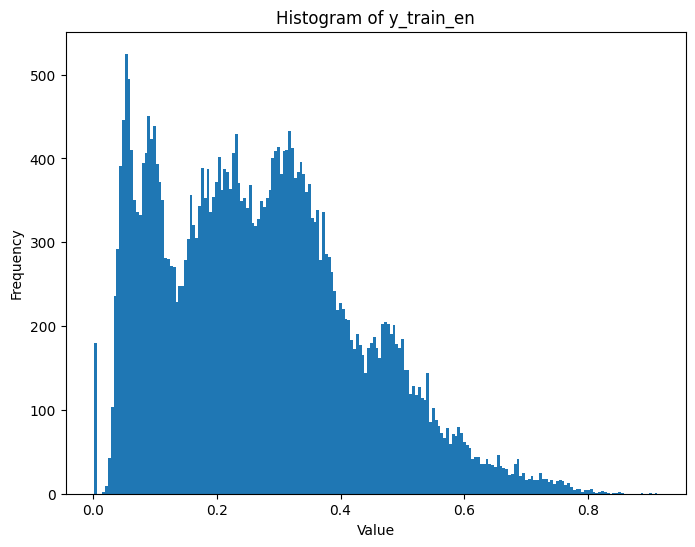

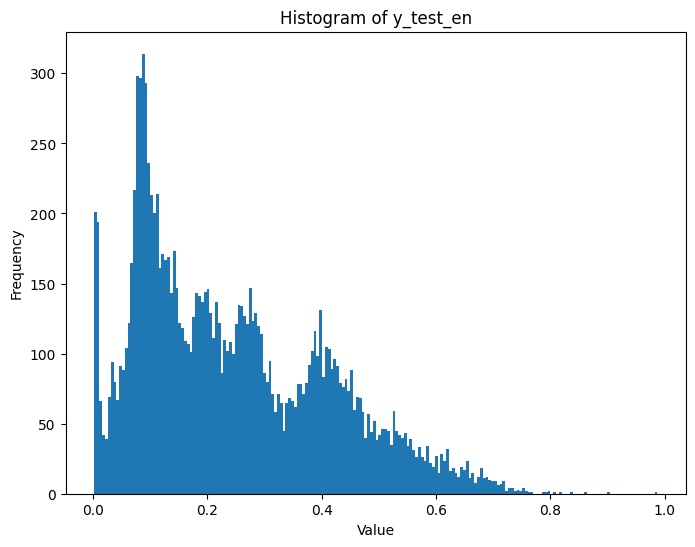

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_52 (Conv1D)          (None, 2000, 8)           104       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 1000, 8)          0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 1000, 16)          400       
                                                                 
 conv1d_54 (Conv1D)          (None, 1000, 16)          784       
                                                                 
 batch_normalization_24 (Bat  (None, 1000, 16)         64        
 chNormalization)                                                
                                                                 
 conv1d_55 (Conv1D)          (None, 1000, 32)         

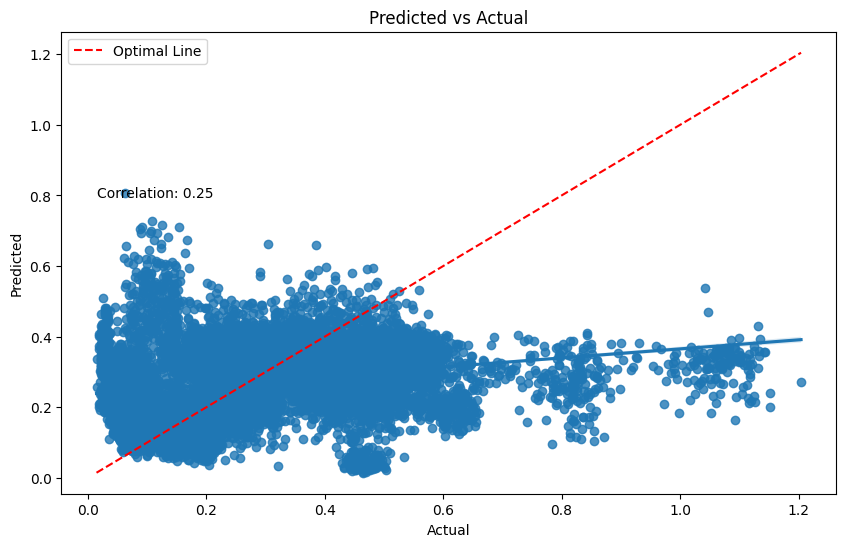

Spearman's rank correlation coefficient: 0.3210311491975666
P-value: 0.00000000000000000000
1131/1131 [==============================] - 112s 99ms/step
Coefficient of Determination 0.8111906736882806


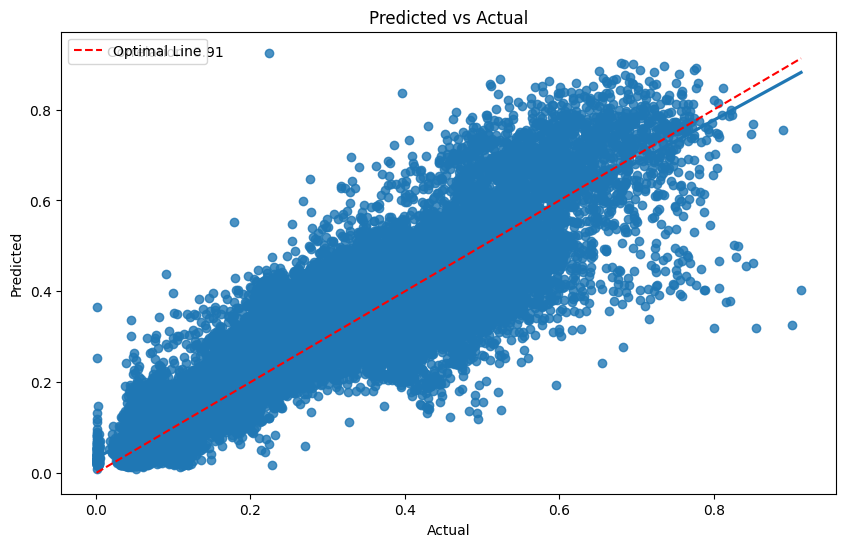

Spearman's rank correlation coefficient: 0.9260810781894034
P-value: 0.00000000000000000000
400/400 [==============================] - 40s 99ms/step
Coefficient of Determination: -0.08370877442859204


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


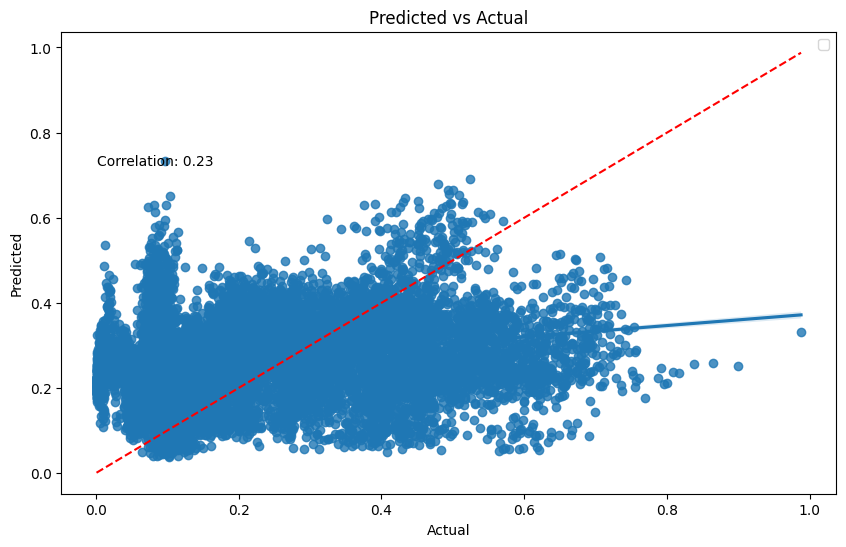

Spearman's rank correlation coefficient: 0.27036070409689517
P-value: 0.00000000000000000000


In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

import h5py
import numpy as np
import pandas as pd

def load_data_for_fold(fold_number, file_path, return_data='numerical_data'):
    with h5py.File(file_path, 'r') as hf:
        # Access the metadata
        metadata_dataset = hf['metadata']
        
        # Convert the metadata to a DataFrame
        metadata_array = metadata_dataset[:]
        columns = metadata_dataset.dtype.names
        metadata_df = pd.DataFrame(metadata_array, columns=columns)

    # Calculate the fold numbers for y_train, y_val, and y_test
    num_folds = 5
    fold_val = (fold_number - 2) % num_folds + 1
    fold_test = fold_number
    
    # Indices for y_train (excluding fold_val and fold_test)
    train_folds = set(range(1, num_folds + 1)) - {fold_val, fold_test}
    train_data = metadata_df[metadata_df['Fold'].isin(train_folds)]
    train_indices = train_data.index.to_numpy()
    
    # Indices for y_val
    val_data = metadata_df[metadata_df['Fold'] == fold_val]
    val_indices = val_data.index.to_numpy()
    
    # Indices for y_test
    test_data = metadata_df[metadata_df['Fold'] == fold_test]
    test_indices = test_data.index.to_numpy()

    # Access the requested data (numerical data or cross-entropy) for y_train, y_val, and y_test
    if return_data == 'numerical_data':
        with h5py.File(file_path, 'r') as hf:
            train = hf[return_data][train_indices]
            val = hf[return_data][val_indices]
            test = hf[return_data][test_indices]
    elif return_data == 'cross_entropy':
        train = train_data['cross_entropy'].to_numpy()
        val = val_data['cross_entropy'].to_numpy()
        test = test_data['cross_entropy'].to_numpy()
    else:
        raise ValueError(f"Invalid return_data value: {return_data}. Expected 'numerical_data' or 'cross_entropy'.")
    
    return train, val, test

# Example usage:
fold_number = 5
file_path = "X_data.h5"
X_train, X_val, X_test = load_data_for_fold(fold_number, file_path, return_data='numerical_data')
y_train, y_val, y_test = load_data_for_fold(fold_number, file_path, return_data='cross_entropy')

#when sampe en is 0.2
import numpy as np
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(y_val, bins=200)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_val_en')

# Show the plot
plt.show()

#when sampe en is 0.2
import numpy as np
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=200)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_train_en')

# Show the plot
plt.show()

#when sampe en is 0.2
import numpy as np
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=200)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of y_test_en')

# Show the plot
plt.show()

#loading in packages
import numpy as np
import tensorflow as tf



new_model = tf.keras.models.load_model('CNN_regression_fold_4lead5/best_model')

# Check its architecture
new_model.summary()



loaded_predictions = new_model.predict(X_val)

# y_val perfomance

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 
# Assuming y_val is the actual target values and loaded_predictions is the predicted output

# Calculate correlation coefficient
correlation = np.corrcoef(y_val.flatten(), loaded_predictions.flatten())[0, 1]
R_square = r2_score(y_val, loaded_predictions) 
print('Coefficient of Determination', R_square)
# Create scatter plot with regression line and optimal line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_val.flatten(), y=loaded_predictions.flatten())
plt.plot([np.min(y_val), np.max(y_val)], [np.min(y_val), np.max(y_val)], color='red', linestyle='--', label='Optimal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.text(np.min(y_val), np.max(loaded_predictions), f'Correlation: {correlation:.2f}', ha='left', va='center')
plt.legend()
plt.show()

import numpy as np
from scipy.stats import spearmanr

# Assuming y_val and loaded_predictions are numpy arrays
y_val = np.array(y_val)
loaded_predictions = np.array(loaded_predictions)

# Calculate the Spearman's rank correlation coefficient and its p-value
correlation, p_value = spearmanr(y_val, loaded_predictions)

print("Spearman's rank correlation coefficient:", correlation)
print("P-value: {:.20f}".format(p_value))


# y_train performance 

#loading in packages
import numpy as np
import tensorflow as tf



loaded_predictions_train = new_model.predict(X_train) 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 
# Assuming y_val is the actual target values and loaded_predictions is the predicted output

# Calculate correlation coefficient
correlation = np.corrcoef(y_train.flatten(), loaded_predictions_train.flatten())[0, 1]
R_square = r2_score(y_train, loaded_predictions_train) 
print('Coefficient of Determination', R_square)
# Create scatter plot with regression line and optimal line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train.flatten(), y=loaded_predictions_train.flatten())
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', linestyle='--', label='Optimal Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.text(np.min(y_val), np.max(loaded_predictions_train), f'Correlation: {correlation:.2f}', ha='left', va='center')
plt.legend()
plt.show()

import numpy as np
from scipy.stats import spearmanr


# Calculate the Spearman's rank correlation coefficient and its p-value
correlation, p_value = spearmanr(y_train, loaded_predictions_train)

print("Spearman's rank correlation coefficient:", correlation)
print("P-value: {:.20f}".format(p_value))

# X_test performance 

#loading in packages
import numpy as np
import tensorflow as tf




loaded_predictions_test = new_model.predict(X_test) 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 


correlation = np.corrcoef(y_test.flatten(), loaded_predictions_test.flatten())[0, 1]
R_square = r2_score(y_test, loaded_predictions_test) 
print('Coefficient of Determination:', R_square)

# Create scatter plot with regression line and optimal line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test.flatten(), y=loaded_predictions_test.flatten())
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.text(np.min(y_test), np.max(loaded_predictions_test), f'Correlation: {correlation:.2f}', ha='left', va='center')
plt.legend()
plt.show()


import numpy as np
from scipy.stats import spearmanr


# Calculate the Spearman's rank correlation coefficient and its p-value
correlation, p_value = spearmanr(y_test, loaded_predictions_test)

print("Spearman's rank correlation coefficient:", correlation)
print("P-value: {:.20f}".format(p_value))